# Some useful Numpy functions

In [35]:
import numpy as np

1. [Zero_insert](#section_zero_insert): The function takes in a vector and returns a new vector where every element is separated by 4 consecutive zeros.
2. [Return_closest](#section_return_closest): The function takes in a vector and returns the value contained in the vector that is closest to a given value.
3. [Cauchy matrix](#Cauchy_matrix): The function takes in two vectors and returns the associated Cauchy matrix.
4. [Most similar](#most_similar): The function takes in a vector and a list of vectors and finds, in the list, the index of the vector that is most similar.
5. [Gradient descent](#gradient_descent): The function does the gradient descent with a fixed learning rate and stops when the update has magnitude under a given tolerance.
6. [All unique chars](#unique_char): The function determines if a string is only made of unique characters.
7. [Find element in a matrix](#find_element): The function takes a square matrix of integers and returns a set of all valid positions (i,j) of a value.
8. [Filter matrix](#filter_matrix): The function takes a matrix of integers and sets the rows and columns of every zero-entry to zero.
9. [Largest sum](#largest_sum): The function takes in a list of integers, finds the sublist of contiguous values with at least one element that has the largest sum and returns the sum.
10. [Pair product](#pairprod): The function takes in a list of positive integers and returns all unique pairs of elements whose product is equal to a given value. 

<a id='section_zero_insert'></a>
#### Zero insert function

In [36]:
def zero_insert(x):
    """
    The function takes in a vector and returns a new vector where every element is separated by 4 consecutive zeros.
    Example:
    [4, 2, 1] --> [4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1]
    :param x: input vector
    :type x: numpy.array
    :return: input vector with elements separated by 4 zeros
    :rtype: numpy.array
    """

    x_zeros = np.array([])
    ## Check if x is not empty
    if x.any():
        x_zeros = np.zeros((len(x) - 1)*4 + len(x))
        j = 0

        for i in range(0, len(x_zeros), 5):
            x_zeros[i] = x[j]
            j += 1
    return x_zeros


In [37]:
## Test the function

x1 = np.array([4, 2, 1])
x2 = np.array([-1, 2, 6, 4, 1])
x3 = np.array([])

print("x1=[4, 2, 1] --> {}".format(zero_insert(x1)))
print("x2=[-1, 2, 6, 4, 1] --> {}".format(zero_insert(x2)))
print("x3=[] --> {}".format(zero_insert(x3)))

x1=[4, 2, 1] --> [4. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1.]
x2=[-1, 2, 6, 4, 1] --> [-1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  6.  0.  0.  0.  0.  4.  0.  0.
  0.  0.  1.]
x3=[] --> []


<a id='section_return_closest'></a>
#### Return closest function

In [38]:
def return_closest(x, val):
    """
    The function takes in a vector and returns the value contained in the vector that is closest to a given value.
    If two values are equidistant from val, return the one that comes first in the vector.
    Example:
    ([3, 4, 5], 2) --> 3

    :param x: input vector
    :type x: numpy.array of int/float
    :param val: input value
    :type val: int | float
    :return: value from x closest to val
    :rtype: int | float
    """

    dif_x = np.abs(x - val)

    return x[np.argmin(dif_x)]

In [39]:
# Test the function

x1 = np.array([4, 8, 0])
x2 = np.array([3, 4, 5])
x3 = np.array([-1, 7, 10])

val = 2

print("x1=[4, 8, 0], val = 2 --> {}".format(return_closest(x1, val)))
print("x2=[3, 4, 5], val = 2 --> {}".format(return_closest(x2, val)))
print("x3=[-1, 7, 10], val = 2 --> {}".format(return_closest(x3, val)))


x1=[4, 8, 0], val = 2 --> 4
x2=[3, 4, 5], val = 2 --> 3
x3=[-1, 7, 10], val = 2 --> -1


<a id='Cauchy_matrix'></a>
#### Cauchy matrix function

In [40]:
def cauchy(x, y):
    """
    The function takes in two vectors and returns the associated Cauchy
    matrix with entries a_ij = 1/(x_i-y_j).

    Example:
    ([1, 2], [3, 4]) --> [[-1/2, -1/3], [-1, -1/2]]

    Note: the function should raise an error of type ValueError if there is a
    pair (i,j) such that x_i=y_j

    :param x: input vector
    :type x: numpy.array of int/float
    :param y: input vector
    :type y: numpy.array of int/float
    :return: Cauchy matrix with entries 1/(x_i-y_j)
    :rtype: numpy.array of float
    :raise ValueError:
    """

    x = np.array([x]).T

    if 0 in x - y:
        raise ValueError("")
        
    return 1 / (x - y)

In [41]:
# Test the function

x1 = np.array([1, 2])
y1 = np.array([3, 4])

x2 = np.array([1, 4])
y2 = np.array([4, 2])

print("x1=[1, 2], y1=[3, 4] --> {}".format(cauchy(x1, y1)))
print("x2=[1, 4], y2=[4, 2] --> {}".format(cauchy(x2, y2)))


x1=[1, 2], y1=[3, 4] --> [[-0.5        -0.33333333]
 [-1.         -0.5       ]]


ValueError: 

<a id='most_similar'></a>

#### Most similar vectors

In [42]:
def most_similar(x, v_list):
    """
    The function takes in a vector x and a list of vectors and finds,
    in the list, the index of the vector that is most similar to x using
    cosine similarity.

    Example:
    ([1, 1], [[1, 0.9], [-1, 1]]) --> 0 (corresponding to [1,0.9])

    :param x: input vector
    :type x: numpy.array of int/float
    :param v_list: list of vectors
    :type v_list: list of numpy.array
    :return: index of element in list that is closest to x in cosine-sim
    :rtype: int
    """

# Initialize variables
    cos_theta_max = -1
    index = 0
    index_max = 0

# Find the biggest cosine

    for v in v_list:
        cos_theta = (x@v) / np.sqrt(x@x * v@v)

        if cos_theta > cos_theta_max:
            cos_theta_max = cos_theta
            index_max = index

        index += 1

    return index_max

In [43]:
# Test the function

x = np.array([1, 1])
v_list = np.array([[1, 0.9], [-1, 1]])

print("x = [1, 1], v_list = [[1, 0.9], [-1, 1]]  --> {}".format(most_similar(x, v_list)))


x = [1, 1], v_list = [[1, 0.9], [-1, 1]]  --> 0


<a id='gradient_descent'></a>

### Gradient descent

In [44]:

def gradient_descent(x_0, learning_rate, tol):
    """
    The function does gradient descent with a fixed learning_rate
    on function f with gradient g and stops when the update has magnitude
    under a given tolerance level (i.e. when |xk-x(k-1)| < tol).
    Return a tuple with the position, the value of f at that position and the
    magnitude of the last update.
    h(x) = (x-1)^2 + exp(-x^2/2)
    f(x) = log(h(x))
    g(x) = (2(x-1) - x exp(-x^2/2)) / h(x)

    Example:
    (1.0, 0.1, 1e-3) --> approximately (1.2807, -0.6555, 0.0008)

    :param x_0: initial point
    :type x_0: float
    :param learning_rate: fixed learning_rate
    :type learning_rate: float
    :param tol: tolerance for the magnitude of the update
    :type tol: float
    :return: the position, the value at that position and the latest update
    :rtype: tuple of three float
    """

    x = x_0

    while -learning_rate*g(x) > tol:
        x -= learning_rate*g(x)

    return (x - learning_rate*g(x), f(x - learning_rate*g(x)), -learning_rate*g(x))


def h(x):
    return (x - 1)**2 + np.exp((-x**2)/2)


def f(x):
    return np.log(h(x))


def g(x):
    return (2*(x-1) - x*np.exp((-x**2)/2)) / h(x)


In [45]:
# Test the function
gradient_descent(1.0, 0.1, 1e-3)

(1.2807049030422724, -0.6555012751335543, 0.00089179359769791)

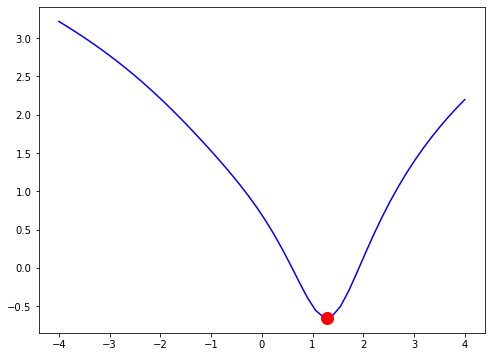

In [56]:
from matplotlib import pyplot as plt

x = np.linspace(-4, 4, 50)

plt.figure(figsize=(8, 6))
plt.plot(x, f(x), color = "blue")
plt.plot(gradient_descent(1.0, 0.1, 1e-3)[0], gradient_descent(1.0, 0.1, 1e-3)[1], marker='o', markersize=12, color = 'red')

<a id='unique_char'></a>

#### All unique characters function



In [47]:
def all_unique_chars(string):
    """
    The function determines if a string is only made of unique
    characters and returns True if that's the case, False otherwise.
    Upper case and lower case should be considered as the same character.

    Example:
    "qwr#!" --> True, "q Qdf" --> False

    :param string: input string
    :type string:  string
    :return:      true or false if string is made of unique characters
    :rtype:        bool
    """

    return len(set(string.lower())) == len(string)

In [48]:
## Test the function

str1 = "qwr#!"
str2 = "q Qdf"

print("qwr#!  --> {}".format(all_unique_chars(str1)))
print("q Qdf  --> {}".format(all_unique_chars(str2)))

qwr#!  --> True
q Qdf  --> False


<a id='find_element'></a>

#### Find element in a matrix



In [49]:
def find_element(sq_mat, val):
    """
    The function takes a square matrix of integers and returns a set of all valid
    positions (i,j) of a value. Each position should be returned as a tuple of two
    integers.

    The matrix is structured in the following way:
    - each row has strictly decreasing values with the column index increasing
    - each column has strictly decreasing values with the row index increasing
    The following matrix is an example:

    Example 1 :
    mat = [ [10, 7, 5],
            [ 9, 4, 2],
            [ 5, 2, 1] ]
    find_element(mat, 4) --> {(1, 1)}

    Example 2 :
    mat = [ [10, 7, 5],
            [ 9, 4, 2],
            [ 5, 2, 1] ]
    find_element(mat, 5) --> {(0, 2), (2, 0)}

    The function should raise an exception ValueError if the value isn't found.

    :param sq_mat: the square input matrix with decreasing rows and columns
    :type sq_mat:  numpy.array of int
    :param val:    the value to be found in the matrix
    :type val:     int
    :return:       all positions of the value in the matrix
    :rtype:        set of tuple of int
    :raise ValueError:
    """

    position = set(tuple(coord) for coord in np.argwhere(sq_mat == val))

    if not position:
        raise ValueError

    return position




In [50]:
# Test the function:

mat = np.array([[10, 7, 5],[9, 4, 2],[5, 2, 1]])

find_element(mat, 4)

{(1, 1)}

<a id='filter_matrix'></a>

#### Filter matrix



In [51]:
def filter_matrix(mat):
    """
    The function takes an n x p matrix of integers and sets the rows
    and columns of every zero-entry to zero.

    Example:
    [ [1, 2, 3, 1],        [ [0, 2, 0, 1],
      [5, 2, 0, 2],   -->    [0, 0, 0, 0],
      [0, 1, 3, 3] ]         [0, 0, 0, 0] ]

    The complexity of the function should be linear in n and p.

    :param mat: input matrix
    :type mat:  numpy.array of int
    :return:   a matrix where rows and columns of zero entries in mat are zero
    :rtype:    numpy.array
    """

    exit_mat = mat
    for coord in np.argwhere(mat == 0):
        exit_mat[coord[0], :] = 0
        exit_mat[:, coord[1]] = 0

    return exit_mat

In [52]:
# Test the function

mat = np.array([[10, 7, 5, 1],[9, 4, 0, 2],[0, 5, 2, 1]])

filter_matrix(mat)

array([[0, 7, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

<a id='largest_sum'></a>


#### Largest sum



In [53]:
def largest_sum(intlist):
    """
    The function takes a list of integers,
    finds the sublist of contiguous values with at least one
    element that has the largest sum and returns the sum.
    If the list is empty, 0 should be returned.

    Example:
    [-1, 2, 7, -3] --> the sublist with larger sum is [2, 7], the sum is 9.

    :param intlist: input list of integers
    :type intlist:  list of int
    :return:       the largest sum
    :rtype:         int
    """

    if not intlist:
        return 0

    larger_sum = max(intlist)
    for index_i in range(len(intlist)):
        for index_j in range(index_i + 1, len(intlist) + 1):
            if sum(intlist[index_i:index_j]) > larger_sum:
                larger_sum = sum(intlist[index_i:index_j])

    return larger_sum

In [54]:
## Test the function

list1 = [-1, 2, 7, -3]

print("The largest sum of [-1, 2, 7, -3] is: {}".format(largest_sum(list1)))


The largest sum of [-1, 2, 7, -3] is: 9


<a id='pairprod'></a>

#### Pair product function



In [55]:
def pairprod(intlist, val):
    """
    The function takes in a list of positive integers (elements > 0)
    and returns all unique pairs of elements whose product is equal to a given
    value. The pairs are of the form (i, j) with i<=j.
    The ordering of the pairs does not matter.

    Example:
    ([3, 5, 1, 2, 3, 6], 6) --> {(2, 3), (1, 6)}

    Complexity target: subquadratic

    :param intlist: input list of integers
    :type intlist:  list of int
    :param val:     given value products will be compared to
    :type val:      int
    :return:        pairs of elements such that the product of corresponding
                    entries matches the value val
    :rtype:         set of tuple
    """

    list_tuple = []
    for index_i in range(len(intlist)+1):
        for index_j in range(index_i, len(intlist)):
            if intlist[index_i]*intlist[index_j] == val:
                list_tuple.append(tuple(sorted((intlist[index_i], intlist[index_j]))))

    return set(list_tuple)


In [34]:
## Test the function

list2 = [3, 5, 1, 2, 3, 6]
value = 6

print("([3, 5, 1, 2, 3, 6], 6) --> {}".format(pairprod(list2, value)))

([3, 5, 1, 2, 3, 6], 6) --> {(2, 3), (1, 6)}
